# Homework 8

# II

做过了

# III

## 1.3

(1)

不妨记两个实根为$z_1, z_2$，则该二阶差分方程的通解为：

$$
X_n = C_1 z_1^{-n} + C_2 z_2^{-n}
$$

带入初值，得：

$$
\begin{cases}
C_1 + C_2 = X_0 \\
C_1 z_1^{-1} + C_2 z_2^{-1} = X_1
\end{cases}
$$  

解出$C_1, C_2$代入即可。


(2)

通解为：

$$
X_n = (C_1n + C_2)  z^{-n}
$$

代入初值即可。

(3)

同(1)

## 1.4

(1)
\begin{aligned}
A(\mathscr B)(\alpha_j^{-t}t^l) &= 
\alpha_j^{-t}t^l - \sum\limits_{i=1}^p a_i \mathscr B^i(\alpha_j^{-t}t^l) \\ 
&= \alpha_j^{-t}t^l - \sum\limits_{i=1}^p a_i \alpha_j^{-t+i}(t-i)^l \\
&= (-\frac{1}{\ln{\alpha_j}})^{l} (\alpha_j^{-t})^{(l)} - \sum\limits_{i=1}^p a_i (-\frac{1}{\ln{\alpha_j}})^{l} (\alpha_j^{-t+i})^{(l)} \\
&= (-\frac{1}{\ln{\alpha_j}})^{l} (\alpha_j^{-t})^{(l)}A(\alpha_j) = 0
\end{aligned}

(2)
\begin{aligned}
A(\mathscr B)(\rho_j^{-t}t^l\cos(t\lambda_j)) &= 
\rho_j^{-t}t^l\cos(t\lambda_j) - \sum\limits_{i=1}^p a_i \mathscr B^i(\rho_j^{-t}t^l\cos(t\lambda_j)) \\
&= \rho_j^{-t}t^l\cos(t\lambda_j) - \sum\limits_{i=1}^p a_i \rho_j^{-t+i}(t-i)^l\cos((t-i)\lambda_j) \\
&= \Re(\rho_j^{-t}t^l e^{it\lambda_j}) - \sum\limits_{i=1}^p a_i \Re(\rho_j^{-t+i}(t-i)^l e^{i(t-i)\lambda_j}) \\
\end{aligned}

余下和（1）同理。

(3)

和（2）同理

# V

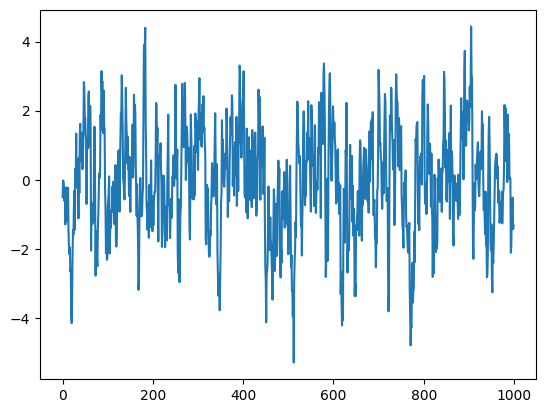

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a = 0.8
epsilon = np.random.normal(0, 1, 1000)
X0 = epsilon[0]
X1 = 0.8*epsilon[0] + epsilon[1]
X = np.array([X0, X1])
for k in range(2, 1000):
    X = np.append(X, a*X[k-1] + epsilon[k])

plt.plot(X)
plt.show()

In [13]:
def order(X, k):
    new_X = np.zeros((len(X),k)).copy()
    for n in range(k):
        new_X[:, n] = np.roll(X, n+1)
        new_X[:n+1, n] = 0
    return new_X.copy(), X.copy()

def Ols(X, k):
    new_X, Y = order(X, k)
    A = np.dot(new_X.T, new_X)
    B = np.dot(new_X.T, Y)
    beta = np.linalg.solve(A, B)
    return beta, (Y - np.dot(new_X, beta)).std(ddof=2)

a, std = Ols(X, 1)
print(a, std)

[0.77790306] 0.9698923934434892


In [14]:
def f(a, std, Lambda):
    return std**2 / (2*np.pi*(1 + a**2 - 2*a*np.cos(Lambda)))


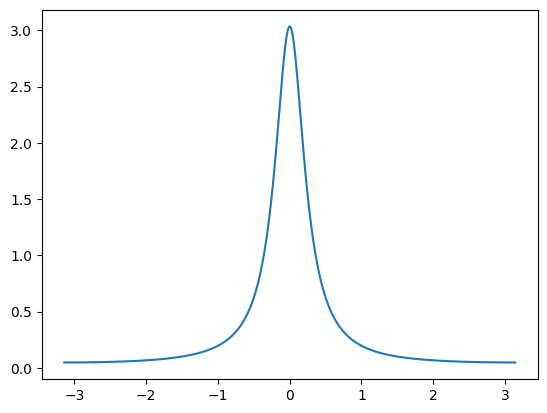

In [16]:
Lambda = np.linspace(-np.pi, np.pi, 1000)
plt.plot(Lambda, f(a, std, Lambda))